In [1]:
# Load dependencies
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Load dataset from CSV
data = pd.read_csv('Resources/SystemData.csv').drop('date', axis='columns')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 27 columns):
step02h_eqparamA       462 non-null object
step02t_eqparamA       462 non-null object
step03h_eqparamA       462 non-null object
step03t_eqparamA       462 non-null object
step04h_eqparamA       462 non-null object
step04t_eqparamA       462 non-null object
step05h_eqparamA       462 non-null object
step05t_eqparamA       462 non-null object
step08h_eqparamA       462 non-null object
step10h_eqparamA       462 non-null object
step12h_eqparamA       462 non-null object
system_eqparamA        462 non-null object
step01at_eqparamB      462 non-null object
step01bt_eqparamB      462 non-null object
step02t_eqparamB       462 non-null object
step04t_eqparamB       462 non-null object
step05t_eqparamB       462 non-null object
step01h_reagparamA     462 non-null object
step01at_reagparamA    462 non-null object
step01bt_reagparamA    462 non-null object
step03h_reagparamB     462 non-null

In [3]:
# Replace NaN to explicit NaN that can be
data = data.apply(pd.to_numeric, errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 27 columns):
step02h_eqparamA       316 non-null float64
step02t_eqparamA       316 non-null float64
step03h_eqparamA       316 non-null float64
step03t_eqparamA       316 non-null float64
step04h_eqparamA       316 non-null float64
step04t_eqparamA       316 non-null float64
step05h_eqparamA       316 non-null float64
step05t_eqparamA       316 non-null float64
step08h_eqparamA       316 non-null float64
step10h_eqparamA       316 non-null float64
step12h_eqparamA       316 non-null float64
system_eqparamA        316 non-null float64
step01at_eqparamB      316 non-null float64
step01bt_eqparamB      316 non-null float64
step02t_eqparamB       316 non-null float64
step04t_eqparamB       316 non-null float64
step05t_eqparamB       316 non-null float64
step01h_reagparamA     316 non-null float64
step01at_reagparamA    316 non-null float64
step01bt_reagparamA    316 non-null float64
step03h_reagpar

In [4]:
# Drop Na rows
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 0 to 456
Data columns (total 27 columns):
step02h_eqparamA       246 non-null float64
step02t_eqparamA       246 non-null float64
step03h_eqparamA       246 non-null float64
step03t_eqparamA       246 non-null float64
step04h_eqparamA       246 non-null float64
step04t_eqparamA       246 non-null float64
step05h_eqparamA       246 non-null float64
step05t_eqparamA       246 non-null float64
step08h_eqparamA       246 non-null float64
step10h_eqparamA       246 non-null float64
step12h_eqparamA       246 non-null float64
system_eqparamA        246 non-null float64
step01at_eqparamB      246 non-null float64
step01bt_eqparamB      246 non-null float64
step02t_eqparamB       246 non-null float64
step04t_eqparamB       246 non-null float64
step05t_eqparamB       246 non-null float64
step01h_reagparamA     246 non-null float64
step01at_reagparamA    246 non-null float64
step01bt_reagparamA    246 non-null float64
step03h_reagpar

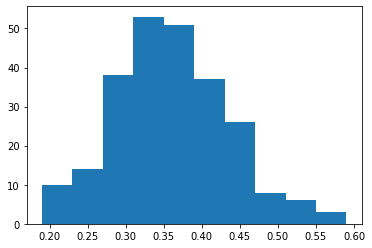

In [5]:
# Examine the system_result histogram to determine if outliers need to be identified/removed
plt.hist(data.system_result)
plt.show()

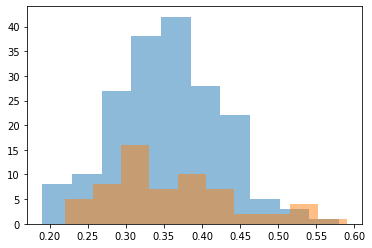

Train mean: 0.35451086956521743 StDev: 0.07057747664145972
Test mean: 0.359032258064516 StDev: 0.08401228788771933


In [6]:
# No clear outliers, splitting data and checking plots to ensure split is valid
X = data.drop('system_result', 1)
y = data.system_result
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
plt.hist(y_train, alpha=0.5, label='Train')
plt.hist(y_test, alpha=0.5, label='Test')
plt.show()
print('Train mean:',y_train.mean(),'StDev:',y_train.std())
print('Test mean:',y_test.mean(),'StDev:',y_test.std())

In [7]:
# Set y train and test to categories
y_train_cat = []
y_train_array = y_train.values
for i in range(len(y_train_array)):
    if y_train_array[i] <= 0.35:
        cat = 'Good'
    elif 0.37 < y_train_array[i] < 0.40:
        cat = 'Warning'
    else: 
        cat = 'Bad'
    y_train_cat.append(cat)

In [8]:
# Set y train and test to categories
y_test_cat = []
y_test_array = y_test.values
for i in range(len(y_test_array)):
    if y_test_array[i] <= 0.35:
        cat = 'Good'
    elif 0.37 < y_test_array[i] < 0.40:
        cat = 'Warning'
    else: 
        cat = 'Bad'
    y_test_cat.append(cat)

In [9]:
# Insert y back into X to export split and cleaned dataframes
X_train['system_result'] = y_train_cat
data_train = X_train
X_test['system_result'] = y_test_cat
data_test = X_test

In [10]:
data_train.to_csv('Resources/data_train.csv')
data_test.to_csv('Resources/data_test.csv')